# Comparison of SVM and Ensemble Models on the Diabetes Dataset

## Introduction
In this assignment, I will train, evaluate, and compare two different machine learning models (SVM and Random Forest) on the diabetes dataset. I will use grid search for hyperparameter tuning and compare their performance based on precision, recall, and F1-score.

## Step 1: Loading and Exploring the Dataset

In this step, I will load the dataset and perform an initial exploration to understand its structure and characteristics.


In [16]:
import pandas as pd

# Load the dataset
file_path = 'diabetes.csv'  # Update with your file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Dataset Overview
The dataset consists of the following columns:
1. **Pregnancies**: Number of times pregnant
2. **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. **BloodPressure**: Diastolic blood pressure (mm Hg)
4. **SkinThickness**: Triceps skinfold thickness (mm)
5. **Insulin**: 2-Hour serum insulin (mu U/ml)
6. **BMI**: Body mass index (weight in kg/(height in m)^2)
7. **DiabetesPedigreeFunction**: Diabetes pedigree function
8. **Age**: Age (years)
9. **Outcome**: Class variable (0 or 1)

Next, I will get some basic information about the dataset.

In [17]:
# Display dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Missing Values and Statistical Summary

I will check for any missing values and get a statistical summary of the dataset to understand the distribution of the features.

In [18]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

# Display statistical summary
data.describe()

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Step 2: Data Preprocessing

### Handling Missing Values
To handle missing values appropriately. I will replace missing values with the median value of each column.

### Feature Scaling
As features with different scales can affect the performance of machine learning models. I will use StandardScaler to standardize the features.

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Handle missing values by replacing them with the median value
imputer = SimpleImputer(strategy='median')
data_imputed = imputer.fit_transform(data)

# Separate features and target variable
X = data_imputed[:, :-1]
y = data_imputed[:, -1]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 3: Data Visualization

Visualize the distribution of features and the relationships between them to better understand the data.

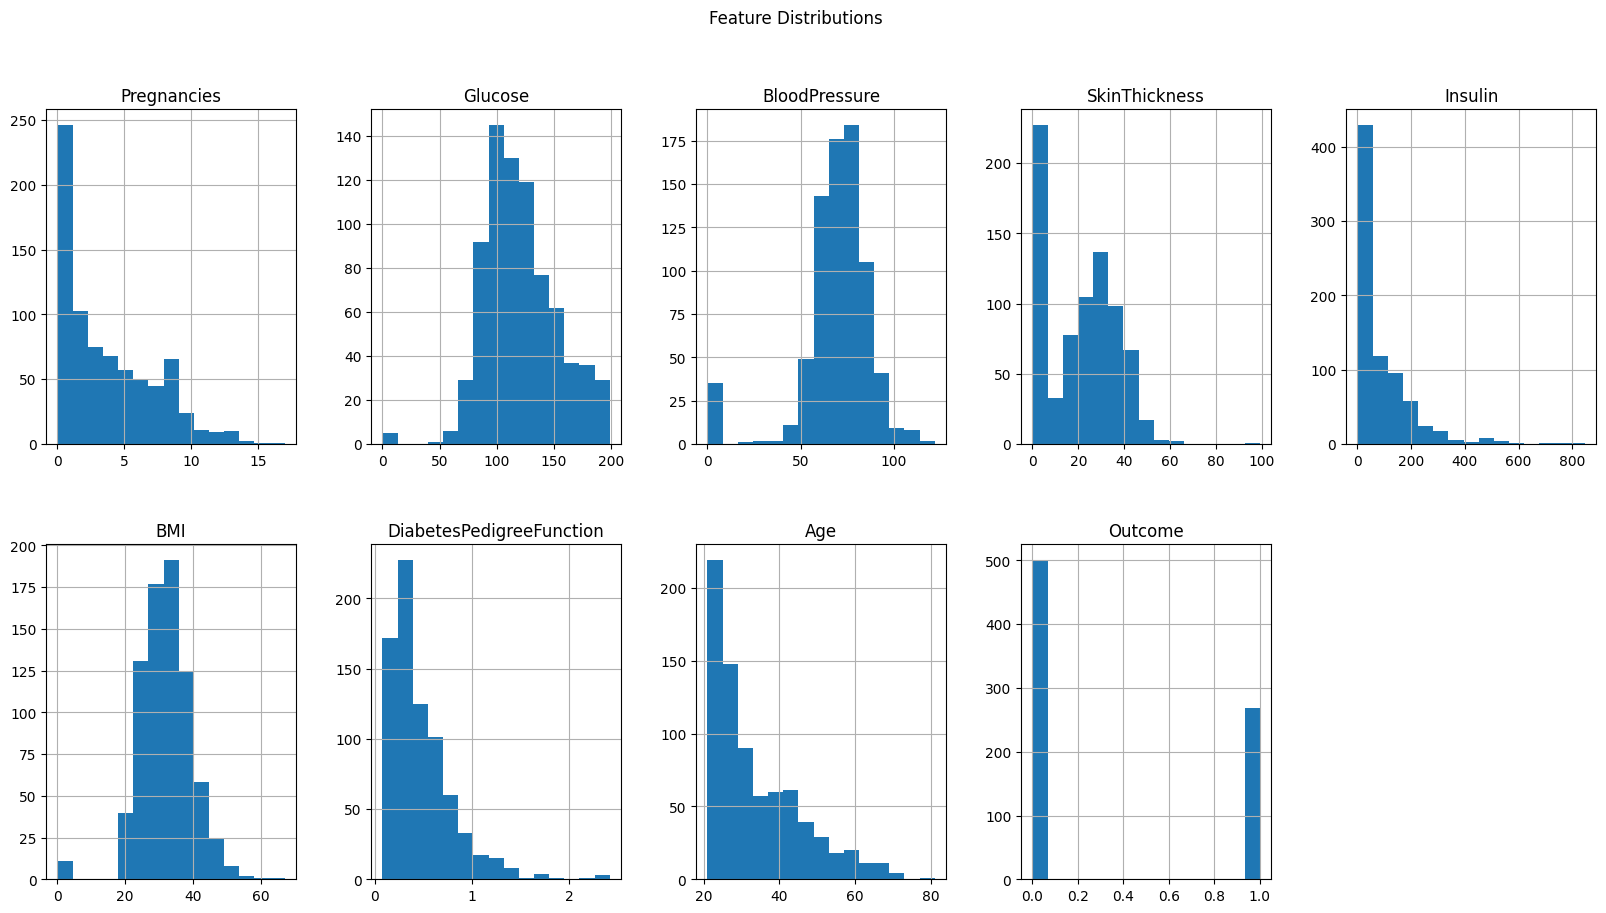

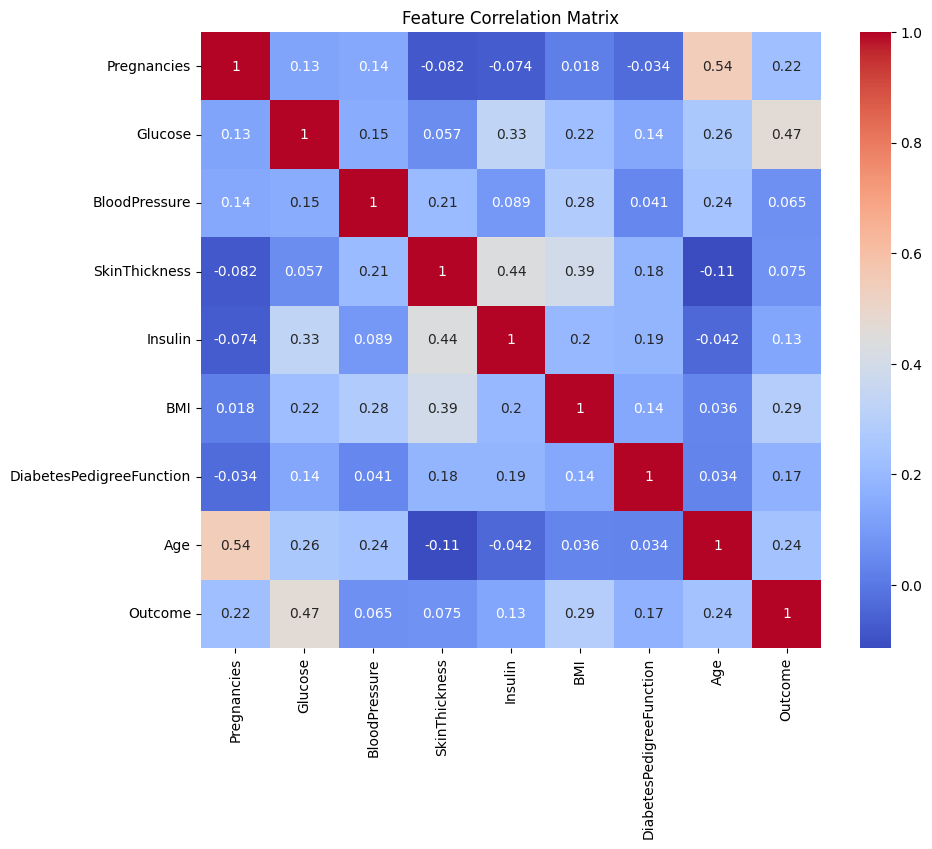

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the imputed data back to a DataFrame for visualization
data_imputed_df = pd.DataFrame(data_imputed, columns=data.columns)

# Plot histograms of each feature
data_imputed_df.hist(bins=15, figsize=(20, 10), layout=(2, 5))
plt.suptitle('Feature Distributions')
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data_imputed_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

## Step 4: Train-Test Split

Split the dataset into training and testing sets to evaluate the models' performance.

In [23]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (614, 8) (614,)
Testing set shape: (154, 8) (154,)


## Step 5: Training and Evaluating the SVM Model

### Hyperparameter Selection for SVM
Support Vector Machines (SVM) have several key hyperparameters that can significantly impact the model's performance. For this assignment, I focus on the following:

- **C (Regularization parameter)**: Controls the trade-off between achieving a low error on the training data and minimizing the norm of the weights.
- **gamma (Kernel coefficient)**: Defines how far the influence of a single training example reaches. Low values mean ‘far’ and high values mean ‘close’. Gamma is crucial for the RBF kernel as it determines the shape of the decision boundary.
- **kernel**: Specifies the kernel type to be used in the algorithm. I am using the 'rbf' (Radial Basis Function) kernel, which is effective in many cases.

I will use GridSearchCV to find the optimal values for C and gamma by trying multiple combinations and selecting the ones that give the best performance on the validation set.

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Create and train SVM model using GridSearchCV
svm_model = SVC()
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Get the best SVM model
best_svm_model = grid_search_svm.best_estimator_

# Predict and evaluate the SVM model
y_pred_svm = best_svm_model.predict(X_test)
svm_report = classification_report(y_test, y_pred_svm, output_dict=True)
print("Best SVM Parameters:", grid_search_svm.best_params_)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

Best SVM Parameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.83      0.82        99
         1.0       0.69      0.67      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



## Step 6: Training and Evaluating the Random Forest Model

### Hyperparameter Selection for Random Forest
Random Forest is an ensemble method that combines multiple decision trees to improve the overall performance. The key hyperparameters for Random Forest include:

- **n_estimators**: The number of trees in the forest.
- **max_depth**: The maximum depth of the trees. Limiting the depth can prevent overfitting.
- **min_samples_split**: The minimum number of samples required to split an internal node. Controls the complexity of the tree.
- **min_samples_leaf**: The minimum number of samples required to be at a leaf node. Ensures that leaf nodes have enough samples to make reliable predictions.

I will use GridSearchCV to find the optimal values for these hyperparameters by trying multiple combinations and selecting the ones that give the best performance on the validation set.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create and train Random Forest model using GridSearchCV
rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Get the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_

# Predict and evaluate the Random Forest model
y_pred_rf = best_rf_model.predict(X_test)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
print("Best Random Forest Parameters:", grid_search_rf.best_params_)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

## Step 7: Comparison of SVM and Random Forest Models

### Performance Metrics Comparison
I will compare the performance of the two models using precision, recall, and F1-score. These metrics provide a comprehensive understanding of the models' strengths and weaknesses.

- **Precision**: The ratio of correctly predicted positive observations to the total predicted positives. High precision indicates low false positive rate.
- **Recall**: The ratio of correctly predicted positive observations to the all observations in actual class. High recall indicates low false negative rate.
- **F1-Score**: The weighted average of Precision and Recall. F1-score is more useful than accuracy in cases where class distribution is uneven.

The bar plot below visualizes these metrics for both models.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract precision, recall, and F1-score for plotting
labels = ['Class 0 Precision', 'Class 1 Precision', 'Class 0 Recall', 'Class 1 Recall', 'Class 0 F1-Score', 'Class 1 F1-Score']
svm_scores = [
    svm_report['0']['precision'], svm_report['1']['precision'],
    svm_report['0']['recall'], svm_report['1']['recall'],
    svm_report['0']['f1-score'], svm_report['1']['f1-score']
]
rf_scores = [
    rf_report['0']['precision'], rf_report['1']['precision'],
    rf_report['0']['recall'], rf_report['1']['recall'],
    rf_report['0']['f1-score'], rf_report['1']['f1-score']
]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, svm_scores, width, label='SVM')
rects2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of SVM and Random Forest Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Attach a text label above each bar in rects, displaying its height.
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Conclusion
In this notebook, I trained and evaluated two machine learning models (SVM and Random Forest) on the diabetes dataset. And then performed hyperparameter tuning using grid search and compared the performance of the models based on precision, recall, and F1-score. The visualization provides a clear comparison of the models' performance metrics.
